In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_excel("National_Accidents_Australia_main.xlsx")


In [3]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [4]:
data.shape

(117919, 13)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


cause_of_injury_column = data['Cause of injury']

value_counts = cause_of_injury_column.value_counts()

print(value_counts.head(10))



Traffic                    86140
Medical events              8405
All other trauma events     7617
Non-traffic                 6086
Unknown traffic             5554
Other transport             4117
Name: Cause of injury, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


cause_of_injury_column = data['ABS remoteness area']

value_counts = cause_of_injury_column.value_counts()

print(value_counts.head(10))



Major Cities    49054
Regional        40542
Remote          15883
Missing         12440
Name: ABS remoteness area, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt


cause_of_injury_column = data['Road user']

value_counts = cause_of_injury_column.value_counts()

print(value_counts.head(10))


Not applicable                   31779
Car driver                       16672
Car passenger                    15551
Pedal cyclist                    14794
Motorcyclist                     14694
Pedestrian                        7918
Car unknown position              5406
Other or unknown                  3186
Pick-up truck or van occupant     2578
Heavy transport driver            2419
Name: Road user, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


cause_of_injury_column = data['Counterparty']

value_counts = cause_of_injury_column.value_counts()

print(value_counts.head(10))


Not applicable                               31779
Car, pick-up truck or van                    21418
Non-collision transport accident             20285
Other and unspecified transport accidents    15742
Fixed or stationary object                   12967
Heavy transport vehicle or bus                7209
Pedestrian or animal                          3232
2- or 3- wheeled motor vehicle                2140
Pedal cycle                                   2061
Other non-motor vehicle                        686
Name: Counterparty, dtype: int64


In [9]:
data.shape

(117919, 13)

# inplace

In [10]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [11]:
data.shape

(112982, 13)

In [12]:
import pandas as pd

dummies = pd.get_dummies(data['Month'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Month', axis=1, inplace=True)

data.head()

,Calendar year,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,...,category_December,category_February,category_January,category_July,category_June,category_March,category_May,category_November,category_October,category_September
0,2011,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2011,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2011,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2011,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import pandas as pd

dummies = pd.get_dummies(data['ABS remoteness area'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('ABS remoteness area', axis=1, inplace=True)

data.head()

,Calendar year,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,...,category_June,category_March,category_May,category_November,category_October,category_September,category_Major Cities,category_Missing,category_Regional,category_Remote
0,2011,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2011,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2011,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2011,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,2011,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
import pandas as pd

dummies = pd.get_dummies(data['Cause of injury'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Cause of injury', axis=1, inplace=True)

data.head()

,Calendar year,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,...,category_Major Cities,category_Missing,category_Regional,category_Remote,category_All other trauma events,category_Medical events,category_Non-traffic,category_Other transport,category_Traffic,category_Unknown traffic
0,2011,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765,...,1,0,0,0,1,0,0,0,0,0
1,2011,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010,...,1,0,0,0,1,0,0,0,0,0
2,2011,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859,...,1,0,0,0,1,0,0,0,0,0
3,2011,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229,...,1,0,0,0,1,0,0,0,0,0
4,2011,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097,...,1,0,0,0,1,0,0,0,0,0


In [15]:
import pandas as pd

dummies = pd.get_dummies(data['Sex'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Sex', axis=1, inplace=True)

data.head()

,Calendar year,Age group,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,category_April,...,category_Remote,category_All other trauma events,category_Medical events,category_Non-traffic,category_Other transport,category_Traffic,category_Unknown traffic,category_Female,category_Male,category_intersex or indeterminate or missing
0,2011,0-7,Not applicable,Not applicable,765.0,1007,0.0,0.0,765,1,...,0,1,0,0,0,0,0,1,0,0
1,2011,0-7,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010,1,...,0,1,0,0,0,0,0,0,1,0
2,2011,17-25,Not applicable,Not applicable,859.0,1597,0.0,0.0,859,1,...,0,1,0,0,0,0,0,1,0,0
3,2011,17-25,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229,1,...,0,1,0,0,0,0,0,0,1,0
4,2011,26-39,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097,1,...,0,1,0,0,0,0,0,1,0,0


In [16]:
import pandas as pd

dummies = pd.get_dummies(data['Age group'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Age group', axis=1, inplace=True)

data.head()

,Calendar year,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,category_April,category_August,...,category_Male,category_intersex or indeterminate or missing,category_0-7,category_17-25,category_26-39,category_40-64,category_65-74,category_75+,category_8-16,category_Missing
0,2011,Not applicable,Not applicable,765.0,1007,0.0,0.0,765,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010,1,0,...,1,0,1,0,0,0,0,0,0,0
2,2011,Not applicable,Not applicable,859.0,1597,0.0,0.0,859,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2011,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2011,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
import pandas as pd

dummies = pd.get_dummies(data['Road user'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Road user', axis=1, inplace=True)

data.head()

,Calendar year,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,category_April,category_August,category_December,...,category_Car unknown position,category_Heavy transport driver,category_Heavy transport passenger,category_Heavy transport unknown position,category_Motorcyclist,category_Not applicable,category_Other or unknown,category_Pedal cyclist,category_Pedestrian,category_Pick-up truck or van occupant
0,2011,Not applicable,765.0,1007,0.0,0.0,765,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2011,Not applicable,1010.0,1694,0.0,0.0,1010,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2011,Not applicable,859.0,1597,0.0,0.0,859,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2011,Not applicable,2231.0,3878,2.0,3.0,2229,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2011,Not applicable,1098.0,2347,1.0,14.0,1097,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
import pandas as pd

dummies = pd.get_dummies(data['Counterparty'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Counterparty', axis=1, inplace=True)

data.head()

,Calendar year,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,category_April,category_August,category_December,category_February,...,"category_Car, pick-up truck or van",category_Fixed or stationary object,category_Heavy transport vehicle or bus,category_Non-collision transport accident,category_Not applicable,category_Other and unspecified transport accidents,category_Other non-motor vehicle,category_Pedal cycle,category_Pedestrian or animal,category_Train
0,2011,765.0,1007,0.0,0.0,765,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2011,1010.0,1694,0.0,0.0,1010,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2011,859.0,1597,0.0,0.0,859,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2011,2231.0,3878,2.0,3.0,2229,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2011,1098.0,2347,1.0,14.0,1097,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
import pandas as pd

dummies = pd.get_dummies(data['Calendar year'], prefix='category')

data = pd.concat([data, dummies], axis=1)

data.drop('Calendar year', axis=1, inplace=True)

data.head()

,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,category_April,category_August,category_December,category_February,category_January,...,category_2012,category_2013,category_2014,category_2015,category_2016,category_2017,category_2018,category_2019,category_2020,category_2021
0,765.0,1007,0.0,0.0,765,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1010.0,1694,0.0,0.0,1010,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,859.0,1597,0.0,0.0,859,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2231.0,3878,2.0,3.0,2229,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1098.0,2347,1.0,14.0,1097,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.shape

(112982, 73)

In [21]:
data.to_csv('filename.csv', index=False, sep='\t')

In [22]:
data_filtered = data[data['category_Traffic'] == 1]

data_filtered.to_csv('filtered_data.csv', index=False)

In [23]:
data_filtered.shape

(81562, 73)

In [24]:
data_filtered2 = data_filtered[(data_filtered['category_Regional'] == 1) | (data_filtered['category_Major Cities'] == 1)]

data_filtered2.to_csv('filtered_dataaaaaa.csv', index=False)

In [23]:
data_filtered2.shape

NameError: name 'data_filtered2' is not defined

In [23]:
data_filtered = data_filtered[(data_filtered['category_Car driver'] == 1) | (data_filtered['category_Motorcyclist'] == 1)
   |(data_filtered['category_Pedal cyclist'] == 1)  |   (data_filtered['category_Pedestrian'] == 1)  |
                               (data_filtered['category_Car passenger'] == 1) ]

data_filtered.to_csv('filtered_new.csv', index=False)

In [24]:
data_filtered.shape

(66593, 73)

In [25]:
data_filtered = data_filtered[(data_filtered['category_Female'] == 1) | (data_filtered['category_Male'] == 1)]

data_filtered.to_csv('filtered_data_newwwwww.csv', index=False)

In [26]:
data_filtered.shape

(66580, 73)

In [27]:
data_filtered = data_filtered[(data_filtered['category_Car driver'] == 1) | (data_filtered['category_Motorcyclist'] == 1)
   |(data_filtered['category_Pedal cyclist'] == 1)  |   (data_filtered['category_Pedestrian'] == 1)  |
                               (data_filtered['category_Car passenger'] == 1) ]

data_filtered.to_csv('finalfinal.csv', index=False)

In [28]:
data_filtered.shape

(66580, 73)

In [29]:
data_clean = pd.read_csv('finalfinal.csv')
data_clean.head(10)

,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations,category_April,category_August,category_December,category_February,category_January,...,category_2012,category_2013,category_2014,category_2015,category_2016,category_2017,category_2018,category_2019,category_2020,category_2021
0,5.0,214,0.0,0.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,21,0.0,0.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0.0,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,0.0,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,0.0,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,2,0.0,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5.0,18,0.0,0.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.0,5,0.0,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.0,15,0.0,0.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2.0,3,0.0,0.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data_clean.shape

(66580, 73)

In [41]:
data_clean['Count of cases']['category_Car driver'].sum()

KeyError: 'category_Car driver'

In [42]:
data_clean['category_Car driver'].sum()

16050

In [35]:

months_columns2020 = ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_columns2021 = ['January', 'February', 'March']
year_columns2020 = ['2020 year']
year_columns2021 = ['2021 year']

data_clean['covid'] = 0

for month in months_columns2020:
    for year in year_columns2020:
        data_clean.loc[(data_clean[month] == 1) & (data_clean[year] == 1), 'covid'] = 1

for month in months_columns2021:
    for year in year_columns2021:
        data_clean.loc[(data_clean[month] == 1) & (data_clean[year] == 1), 'covid'] = 1

In [36]:
data_clean.to_csv('final_with_covid.csv', index=False)

In [37]:
data_clean['covid'].value_counts()

0    48297
1     5741
Name: covid, dtype: int64

In [38]:
number_of_covid_cases_2021 = (data_clean['2020 year'] == 1) & (data_clean['covid'] == 1)
number_of_covid_cases_2021.sum()

4490

In [39]:
data.shape

(112982, 73)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

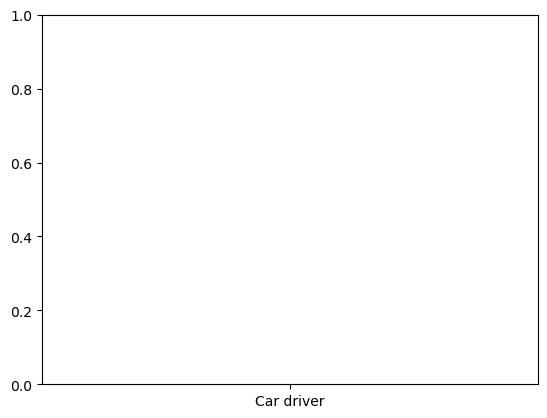

In [40]:
import matplotlib.pyplot as plt

# داده‌های تصادفی برای مثال

# نام ستون‌ها
columns = ['Car driver',  'Pedestrian', 'Car passenger', 'Pedal cyclist', 'Motorcyclist']

# رسم نمودار میله‌ای
plt.bar(columns, data_clean)

# اضافه کردن برچسب به محور x و y
plt.xlabel('نام ستون')
plt.ylabel('فراوانی')

# اضافه کردن عنوان به نمودار
plt.title('نمودار میله‌ای')

# نمایش نمودار
plt.show()


In [48]:
data_clean[]['category_2019'].sum

KeyError: -1

In [46]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66580 entries, 0 to 66579
Data columns (total 73 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Count of cases                                      66580 non-null  float64
 1   Bed days                                            66580 non-null  int64  
 2   Died_cases                                          66580 non-null  float64
 3   Died_bed_days                                       66580 non-null  float64
 4   Hospitalisations                                    66580 non-null  int64  
 5   category_April                                      66580 non-null  int64  
 6   category_August                                     66580 non-null  int64  
 7   category_December                                   66580 non-null  int64  
 8   category_February                                   66580 non-null  int64  
